In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

import os
for dirname, _, filenames in os.walk('../input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Todos los resultados se guardan en el directorio actual.

import warnings
warnings.filterwarnings('ignore')
print("\n No se muestran Warning")
#warnings.filterwarnings('always')
#print("\n Se muestran Warnings")

../input\aisles.csv
../input\departments.csv
../input\kaggle_instakart_jcv.db
../input\orders.csv
../input\order_products__prior.csv
../input\order_products__train.csv
../input\products.csv

 No se muestran Warning


### Preparamos los datos

In [2]:
#Cargo los archivos a dataframes
aisles = pd.read_csv('../input/aisles.csv')
departments = pd.read_csv('../input/departments.csv')
order_products_prior = pd.read_csv('../input/order_products__prior.csv')
order_products_train = pd.read_csv('../input/order_products__train.csv')
orders = pd.read_csv('../input/orders.csv')
products = pd.read_csv('../input/products.csv')
print("Listo!")

Listo!


In [3]:
# Combino order_productos_prior con products, aisles, departments y orders
order_products_prior = pd.merge(order_products_prior, products, on='product_id', how='left')
order_products_prior = pd.merge(order_products_prior, aisles, on='aisle_id', how='left')
order_products_prior = pd.merge(order_products_prior, departments, on='department_id', how='left')
order_products_prior = pd.merge(order_products_prior, orders, on='order_id', how='left')
order_products_prior.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2,33120,1,1,Organic Egg Whites,86,16,eggs,dairy eggs,202279,prior,3,5,9,8.0
1,2,28985,2,1,Michigan Organic Kale,83,4,fresh vegetables,produce,202279,prior,3,5,9,8.0
2,2,9327,3,0,Garlic Powder,104,13,spices seasonings,pantry,202279,prior,3,5,9,8.0
3,2,45918,4,1,Coconut Butter,19,13,oils vinegars,pantry,202279,prior,3,5,9,8.0
4,2,30035,5,0,Natural Sweetener,17,13,baking ingredients,pantry,202279,prior,3,5,9,8.0


In [4]:
# Combino order_productos_train con products, aisles, departments y orders
order_products_train = pd.merge(order_products_train, products, on='product_id', how='left')
order_products_train = pd.merge(order_products_train, aisles, on='aisle_id', how='left')
order_products_train = pd.merge(order_products_train, departments, on='department_id', how='left')
order_products_train = pd.merge(order_products_train, orders, on='order_id', how='left')
order_products_train.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1,49302,1,1,Bulgarian Yogurt,120,16,yogurt,dairy eggs,112108,train,4,4,10,9.0
1,1,11109,2,1,Organic 4% Milk Fat Whole Milk Cottage Cheese,108,16,other creams cheeses,dairy eggs,112108,train,4,4,10,9.0
2,1,10246,3,0,Organic Celery Hearts,83,4,fresh vegetables,produce,112108,train,4,4,10,9.0
3,1,49683,4,0,Cucumber Kirby,83,4,fresh vegetables,produce,112108,train,4,4,10,9.0
4,1,43633,5,1,Lightly Smoked Sardines in Olive Oil,95,15,canned meat seafood,canned goods,112108,train,4,4,10,9.0


In [5]:
# Chequeo que las columnas son exactamente las mismas
a, b = order_products_prior.columns, order_products_train.columns
print(a, "\n" ,b)
set(a).intersection(b)
len(a) == len(b)

Index(['order_id', 'product_id', 'add_to_cart_order', 'reordered',
       'product_name', 'aisle_id', 'department_id', 'aisle', 'department',
       'user_id', 'eval_set', 'order_number', 'order_dow', 'order_hour_of_day',
       'days_since_prior_order'],
      dtype='object') 
 Index(['order_id', 'product_id', 'add_to_cart_order', 'reordered',
       'product_name', 'aisle_id', 'department_id', 'aisle', 'department',
       'user_id', 'eval_set', 'order_number', 'order_dow', 'order_hour_of_day',
       'days_since_prior_order'],
      dtype='object')


True

In [6]:
# Comprobando si el dataframe tiene filas que pertenecen al conjunto de prueba
#'test' en order_products_prior.eval_set

In [7]:
# Comprobando si el dataframe tiene filas que pertenecen al conjunto de prueba
#'test' en order_products_train.eval_set

In [8]:
# Reorganizar el orden de las columnas según sus preferencias
order_products_prior = order_products_prior[['user_id', 'order_number', 'add_to_cart_order', 'order_id', 'product_id', 'aisle_id', 
                                             'product_name','department_id', 'aisle', 'department','add_to_cart_order', 'reordered', 
                                             'eval_set', 'order_dow', 'order_hour_of_day', 'days_since_prior_order']]
order_products_train = order_products_train[['user_id', 'order_number', 'add_to_cart_order', 'order_id', 'product_id', 'aisle_id', 
                                             'product_name','department_id', 'aisle', 'department','add_to_cart_order', 'reordered', 
                                             'eval_set', 'order_dow', 'order_hour_of_day', 'days_since_prior_order']]

In [9]:
#order_products_prior = order_products_prior.sort_values(by =['user_id', 'order_number']).reset_index()

In [10]:
#order_products_train = order_products_train.sort_values(by =['user_id', 'order_number']).reset_index()
#order_products_train.head(10)

## Agrego nuevas características a los datos que tengo

In [11]:
#Número total de pedidos realizados por cada usuario
users = order_products_prior.groupby(by='user_id')['order_number'].aggregate('max').to_frame('u_num_of_orders').reset_index()

In [12]:
users.head()

,user_id,u_num_of_orders
0,1,10
1,2,14
2,3,12
3,4,5
4,5,4


In [13]:
# Promedio de productos comprados por el usuario en cada compra.
#1. Primero obteniendo el número total de productos en cada pedido.
total_prd_per_order = order_products_prior.groupby(by=['user_id', 'order_id'])['product_id'].aggregate('count').to_frame('total_products_per_order').reset_index()
total_prd_per_order.head(10)

,user_id,order_id,total_products_per_order
0,1,431534,8
1,1,473747,5
2,1,550135,5
3,1,2254736,5
4,1,2295261,6
5,1,2398795,6
6,1,2539329,5
7,1,2550362,9
8,1,3108588,6
9,1,3367565,4


In [14]:
#2. Obtener el promedio de productos comprados por cada usuario
avg_products = total_prd_per_order.groupby(by=['user_id'])['total_products_per_order'].mean().to_frame('u_avg_prd').reset_index()
avg_products.head()

,user_id,u_avg_prd
0,1,5.900000
1,2,13.928571
2,3,7.333333
3,4,3.600000
4,5,9.250000


In [15]:
#borro el dataframe total_prd_per_order 
del total_prd_per_order

In [16]:
#dow de la mayoría de los pedidos realizados por cada usuario
from scipy import stats
dow = order_products_prior.groupby(by='user_id')['order_dow'].agg(lambda x: pd.Series.mode(x)[0]).to_frame('dow_most_orders_u').reset_index()
dow.head(5)

,user_id,dow_most_orders_u
0,1,4
1,2,2
2,3,0
3,4,4
4,5,3


In [17]:
#hora del día en que cada usuario realiza la mayoría de los pedidos
from scipy import stats
#hod = order_products_prior.groupby(by='user_id')['order_hour_of_day'].agg(lambda x: stats.mode(x)[0]).to_frame('hod_most_orders_u').reset_index()
hod = order_products_prior.groupby(by='user_id')['order_hour_of_day'].agg(lambda x: pd.Series.mode(x)[0]).to_frame('hod_most_orders_u').reset_index()
hod.head()

,user_id,hod_most_orders_u
0,1,7
1,2,9
2,3,16
3,4,15
4,5,18


In [18]:
#merging las funciones creadas por el usuario.

#1. fusionando avg_products con usuarios
users = users.merge(avg_products, on='user_id', how='left')
#borrando avg_products
del avg_products
users.head()

,user_id,u_num_of_orders,u_avg_prd
0,1,10,5.900000
1,2,14,13.928571
2,3,12,7.333333
3,4,5,3.600000
4,5,4,9.250000


In [19]:
#2. fusionando dow con users.
users = users.merge(dow, on='user_id', how='left')
#borrando dow
del dow
users.head()

,user_id,u_num_of_orders,u_avg_prd,dow_most_orders_u
0,1,10,5.900000,4
1,2,14,13.928571,2
2,3,12,7.333333,0
3,4,5,3.600000,4
4,5,4,9.250000,3


In [20]:
#3. fusiono hod con users
users = users.merge(hod, on='user_id', how='left')
#borro hod
del hod
users.head()

,user_id,u_num_of_orders,u_avg_prd,dow_most_orders_u,hod_most_orders_u
0,1,10,5.900000,4,7
1,2,14,13.928571,2,9
2,3,12,7.333333,0,16
3,4,5,3.600000,4,15
4,5,4,9.250000,3,18


In [21]:
#número de veces que se compró un producto.
prd = order_products_prior.groupby(by='product_id')['order_id'].agg('count').to_frame('prd_count_p').reset_index()
prd.head()

,product_id,prd_count_p
0,1,1852
1,2,90
2,3,277
3,4,329
4,5,15


In [22]:
#relación de reorden de productos.
reorder_p = order_products_prior.groupby(by='product_id')['reordered'].agg('mean').to_frame('p_reordered_ratio').reset_index()
reorder_p.head()

,product_id,p_reordered_ratio
0,1,0.613391
1,2,0.133333
2,3,0.732852
3,4,0.446809
4,5,0.600000


In [23]:
#fusiono reorder_p con prd
prd = prd.merge(reorder_p, on='product_id', how='left')
#borro reorder_p
del reorder_p
prd.head()

,product_id,prd_count_p,p_reordered_ratio
0,1,1852,0.613391
1,2,90,0.133333
2,3,277,0.732852
3,4,329,0.446809
4,5,15,0.600000


In [24]:
#cuantas veces un usuario compro el mismo producto.
uxp = order_products_prior.groupby(by=['user_id', 'product_id'])['order_id'].agg('count').to_frame('uxp_times_bought').reset_index()
uxp.head()

,user_id,product_id,uxp_times_bought
0,1,196,10
1,1,10258,9
2,1,10326,1
3,1,12427,10
4,1,13032,3


In [25]:
#relación de reorden del usuario para cada producto.
reorder_uxp = order_products_prior.groupby(by=['user_id', 'product_id'])['reordered'].agg('mean').to_frame('uxp_reordered_ratio').reset_index()
reorder_uxp.head()

,user_id,product_id,uxp_reordered_ratio
0,1,196,0.900000
1,1,10258,0.888889
2,1,10326,0.000000
3,1,12427,0.900000
4,1,13032,0.666667


In [26]:
#fusiono los dos dataframe en uno
uxp = uxp.merge(reorder_uxp, on=['user_id', 'product_id'], how='left')
#borro reorder_uxp
del reorder_uxp
uxp.head()

,user_id,product_id,uxp_times_bought,uxp_reordered_ratio
0,1,196,10,0.900000
1,1,10258,9,0.888889
2,1,10326,1,0.000000
3,1,12427,10,0.900000
4,1,13032,3,0.666667


In [27]:
#fusiono users df en uxp
data = uxp.merge(users, on='user_id', how='left')
data.head()

,user_id,product_id,uxp_times_bought,uxp_reordered_ratio,u_num_of_orders,u_avg_prd,dow_most_orders_u,hod_most_orders_u
0,1,196,10,0.900000,10,5.9,4,7
1,1,10258,9,0.888889,10,5.9,4,7
2,1,10326,1,0.000000,10,5.9,4,7
3,1,12427,10,0.900000,10,5.9,4,7
4,1,13032,3,0.666667,10,5.9,4,7


In [28]:
#fusiono el dataframe products en data
data = data.merge(prd, on='product_id', how='left')
data.head()

,user_id,product_id,uxp_times_bought,uxp_reordered_ratio,u_num_of_orders,u_avg_prd,dow_most_orders_u,hod_most_orders_u,prd_count_p,p_reordered_ratio
0,1,196,10,0.900000,10,5.9,4,7,35791,0.776480
1,1,10258,9,0.888889,10,5.9,4,7,1946,0.713772
2,1,10326,1,0.000000,10,5.9,4,7,5526,0.652009
3,1,12427,10,0.900000,10,5.9,4,7,6476,0.740735
4,1,13032,3,0.666667,10,5.9,4,7,3751,0.657158


In [29]:
#borro dataframes no usados
del [users, prd, uxp]

In [30]:
#Me quedo solo con el conjunto de entrenamiento y prueba del dataframe de pedidos.
order_future = orders.loc[((orders.eval_set == 'train') | (orders.eval_set == 'test')), ['user_id', 'eval_set', 'order_id']]
order_future.head()

,user_id,eval_set,order_id
10,1,train,1187899
25,2,train,1492625
38,3,test,2774568
44,4,test,329954
49,5,train,2196797


In [31]:
#fusiono order_future con el df data.
data = data.merge(order_future, on='user_id', how='left')
data.head()

,user_id,product_id,uxp_times_bought,uxp_reordered_ratio,u_num_of_orders,u_avg_prd,dow_most_orders_u,hod_most_orders_u,prd_count_p,p_reordered_ratio,eval_set,order_id
0,1,196,10,0.900000,10,5.9,4,7,35791,0.776480,train,1187899
1,1,10258,9,0.888889,10,5.9,4,7,1946,0.713772,train,1187899
2,1,10326,1,0.000000,10,5.9,4,7,5526,0.652009,train,1187899
3,1,12427,10,0.900000,10,5.9,4,7,6476,0.740735,train,1187899
4,1,13032,3,0.666667,10,5.9,4,7,3751,0.657158,train,1187899


In [32]:
#preparo el df de entrenamiento
data_train = data[data.eval_set == 'train']
data_train.head()

,user_id,product_id,uxp_times_bought,uxp_reordered_ratio,u_num_of_orders,u_avg_prd,dow_most_orders_u,hod_most_orders_u,prd_count_p,p_reordered_ratio,eval_set,order_id
0,1,196,10,0.900000,10,5.9,4,7,35791,0.776480,train,1187899
1,1,10258,9,0.888889,10,5.9,4,7,1946,0.713772,train,1187899
2,1,10326,1,0.000000,10,5.9,4,7,5526,0.652009,train,1187899
3,1,12427,10,0.900000,10,5.9,4,7,6476,0.740735,train,1187899
4,1,13032,3,0.666667,10,5.9,4,7,3751,0.657158,train,1187899


In [33]:
#fusiono la información de order_products_train en data_train
data_train = data_train.merge(order_products_train[['product_id', 'order_id', 'reordered']], on=['product_id', 'order_id'], how='left')
data_train.head()

,user_id,product_id,uxp_times_bought,uxp_reordered_ratio,u_num_of_orders,u_avg_prd,dow_most_orders_u,hod_most_orders_u,prd_count_p,p_reordered_ratio,eval_set,order_id,reordered
0,1,196,10,0.900000,10,5.9,4,7,35791,0.776480,train,1187899,1.0
1,1,10258,9,0.888889,10,5.9,4,7,1946,0.713772,train,1187899,1.0
2,1,10326,1,0.000000,10,5.9,4,7,5526,0.652009,train,1187899,NaN
3,1,12427,10,0.900000,10,5.9,4,7,6476,0.740735,train,1187899,NaN
4,1,13032,3,0.666667,10,5.9,4,7,3751,0.657158,train,1187899,1.0


In [34]:
#llenando los valores NAN
data_train.reordered.fillna(0, inplace=True)

In [35]:
#colocando user_id y product_id como indices
data_train = data_train.set_index(['user_id', 'product_id'])

In [36]:
#borro las columnas eval_set, order_id que no son necesarias para entrenamiento
data_train.drop(['eval_set', 'order_id'], axis=1, inplace=True)

In [37]:
data_train.head()

uxp_times_bought  uxp_reordered_ratio  u_num_of_orders  \
user_id product_id                                                           
1       196                       10             0.900000               10   
        10258                      9             0.888889               10   
        10326                      1             0.000000               10   
        12427                     10             0.900000               10   
        13032                      3             0.666667               10   

                    u_avg_prd  dow_most_orders_u  hod_most_orders_u  \
user_id product_id                                                    
1       196               5.9                  4                  7   
        10258             5.9                  4                  7   
        10326             5.9                  4                  7   
        12427             5.9                  4                  7   
        13032             5.9                  4                  7   

                    prd_count_p  p_reordered_ratio  reordered  
user_id product_id                                             
1       196               35791           0.776480        1.0  
        10258              1946           0.713772        1.0  
        10326              5526           0.652009        0.0  
        12427              6476           0.740735        0.0  
        13032              3751           0.657158        1.0

In [38]:
#preparo el dataset de test.
data_test = data[data.eval_set == 'test']
data_test.head()

,user_id,product_id,uxp_times_bought,uxp_reordered_ratio,u_num_of_orders,u_avg_prd,dow_most_orders_u,hod_most_orders_u,prd_count_p,p_reordered_ratio,eval_set,order_id
120,3,248,1,0.000000,12,7.333333,0,16,6371,0.400251,test,2774568
121,3,1005,1,0.000000,12,7.333333,0,16,463,0.440605,test,2774568
122,3,1819,3,0.666667,12,7.333333,0,16,2424,0.492162,test,2774568
123,3,7503,1,0.000000,12,7.333333,0,16,12474,0.553551,test,2774568
124,3,8021,1,0.000000,12,7.333333,0,16,27864,0.591157,test,2774568


In [39]:
#borro las columnas innecesarias
data_test.drop(['eval_set', 'order_id'], axis=1, inplace=True)

In [40]:
#coloco  user_id y product_id como indice.
data_test = data_test.set_index(['user_id', 'product_id'])

In [41]:
data_test.head()

uxp_times_bought  uxp_reordered_ratio  u_num_of_orders  \
user_id product_id                                                           
3       248                        1             0.000000               12   
        1005                       1             0.000000               12   
        1819                       3             0.666667               12   
        7503                       1             0.000000               12   
        8021                       1             0.000000               12   

                    u_avg_prd  dow_most_orders_u  hod_most_orders_u  \
user_id product_id                                                    
3       248          7.333333                  0                 16   
        1005         7.333333                  0                 16   
        1819         7.333333                  0                 16   
        7503         7.333333                  0                 16   
        8021         7.333333                  0                 16   

                    prd_count_p  p_reordered_ratio  
user_id product_id                                  
3       248                6371           0.400251  
        1005                463           0.440605  
        1819               2424           0.492162  
        7503              12474           0.553551  
        8021              27864           0.591157

In [42]:
#borrando df ya no usados
del [aisles, departments, order_products_prior, order_products_train, orders, order_future, data] 

In [43]:
#reseteo indices
data_train.reset_index(inplace=True)
data_test.reset_index(inplace=True)

In [44]:
data_train.head()

,user_id,product_id,uxp_times_bought,uxp_reordered_ratio,u_num_of_orders,u_avg_prd,dow_most_orders_u,hod_most_orders_u,prd_count_p,p_reordered_ratio,reordered
0,1,196,10,0.900000,10,5.9,4,7,35791,0.776480,1.0
1,1,10258,9,0.888889,10,5.9,4,7,1946,0.713772,1.0
2,1,10326,1,0.000000,10,5.9,4,7,5526,0.652009,0.0
3,1,12427,10,0.900000,10,5.9,4,7,6476,0.740735,0.0
4,1,13032,3,0.666667,10,5.9,4,7,3751,0.657158,1.0


In [45]:
#fusión de los id de pasillos y departamentos con los datos de entrenamiento y test
data_train = data_train.merge(products[['product_id', 'aisle_id']], on='product_id', how='left')
data_test = data_test.merge(products[['product_id', 'aisle_id']], on='product_id', how='left')

In [46]:
#departmentos
data_train = data_train.merge(products[['product_id', 'department_id']], on='product_id', how='left')
data_test = data_test.merge(products[['product_id', 'department_id']], on='product_id', how='left')

In [47]:
columnas = data_train.columns

In [48]:
columnas

Index(['user_id', 'product_id', 'uxp_times_bought', 'uxp_reordered_ratio',
       'u_num_of_orders', 'u_avg_prd', 'dow_most_orders_u',
       'hod_most_orders_u', 'prd_count_p', 'p_reordered_ratio', 'reordered',
       'aisle_id', 'department_id'],
      dtype='object')

In [49]:
#coloco user_id y product_id como indice.
data_test = data_test.set_index(['user_id', 'product_id'])
#coloco user_id y product_id como indice.
data_train = data_train.set_index(['user_id', 'product_id'])

In [50]:
#NUEVO
priorall = data_train
priorall_edit = priorall.drop('reordered', axis=1)

In [51]:
data_test.shape

(4833292, 10)

### Preparamos los datos para el modelo de entrenamiento

In [52]:
# Acortamos los datos
priorall= priorall[1:100001]
priorall_edit = priorall_edit[1:100001]

In [53]:
priorall_edit.reset_index(inplace=True)
priorall.reset_index(inplace=True)


In [54]:
priorall_edit

,user_id,product_id,uxp_times_bought,uxp_reordered_ratio,u_num_of_orders,u_avg_prd,dow_most_orders_u,hod_most_orders_u,prd_count_p,p_reordered_ratio,aisle_id,department_id
0,1,10258,9,0.888889,10,5.9,4,7,1946,0.713772,117,19
1,1,10326,1,0.000000,10,5.9,4,7,5526,0.652009,24,4
2,1,12427,10,0.900000,10,5.9,4,7,6476,0.740735,23,19
3,1,13032,3,0.666667,10,5.9,4,7,3751,0.657158,121,14
4,1,13176,2,0.500000,10,5.9,4,7,379450,0.832555,24,4
...,...,...,...,...,...,...,...,...,...,...,...,...
99995,2541,626,1,0.000000,12,5.0,3,14,662,0.549849,69,15
99996,2541,1263,1,0.000000,12,5.0,3,14,3450,0.464928,21,16
99997,2541,3179,1,0.000000,12,5.0,3,14,754,0.570292,71,16
99998,2541,3298,1,0.000000,12,5.0,3,14,10521,0.710579,21,16


In [55]:
priorall

,user_id,product_id,uxp_times_bought,uxp_reordered_ratio,u_num_of_orders,u_avg_prd,dow_most_orders_u,hod_most_orders_u,prd_count_p,p_reordered_ratio,reordered,aisle_id,department_id
0,1,10258,9,0.888889,10,5.9,4,7,1946,0.713772,1.0,117,19
1,1,10326,1,0.000000,10,5.9,4,7,5526,0.652009,0.0,24,4
2,1,12427,10,0.900000,10,5.9,4,7,6476,0.740735,0.0,23,19
3,1,13032,3,0.666667,10,5.9,4,7,3751,0.657158,1.0,121,14
4,1,13176,2,0.500000,10,5.9,4,7,379450,0.832555,0.0,24,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,2541,626,1,0.000000,12,5.0,3,14,662,0.549849,0.0,69,15
99996,2541,1263,1,0.000000,12,5.0,3,14,3450,0.464928,0.0,21,16
99997,2541,3179,1,0.000000,12,5.0,3,14,754,0.570292,0.0,71,16
99998,2541,3298,1,0.000000,12,5.0,3,14,10521,0.710579,0.0,21,16


### Seleccionemos el Algoritmo
Comparare varios algoritmos y seleccionare el que obtiene mejores resultados

In [56]:
#table for better presentation of results
#Ref : http://stackoverflow.com/questions/30523735/python-dictionary-as-html-table-in-ipython-notebook
class DictTable(dict):
    # Overridden dict class which takes a dict in the form {'a': 2, 'b': 3},
    # and renders an HTML Table in IPython Notebook.
    def _repr_html_(self):
        html = ["<table width=100%>"]
        html.append("<tr>")
        html.append("<th>Classifier</th>")
        html.append("<th>Accuracy</th>")
        html.append("<th>Precision</th>")
        html.append("<th>Recall</th>")
        html.append("</tr>")
        for key, value in self.items():
            html.append("<tr>")
            html.append("<td>{0}</td>".format(key))
            for key_inner,value_inner in value.items():
                html.append("<td>{0}</td>".format(value_inner))
                
           
            html.append("</tr>")
        html.append("</table>")
        return ''.join(html)

In [57]:
labels = priorall['reordered']
import matplotlib.pyplot as plt
from IPython.display import display # Allows the use of display() for DataFrames
import numpy as np
#from sklearn import cross_validation
from sklearn import model_selection
from sklearn.model_selection import StratifiedShuffleSplit,StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.cluster import KMeans
from sklearn.metrics import make_scorer
from numpy import mean
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import f1_score ,fbeta_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import accuracy_score,precision_score,recall_score,precision_recall_fscore_support,roc_auc_score
from sklearn.neighbors import KNeighborsClassifier


classificadores_dicc = {
                    'Logistic Regression':LogisticRegression(random_state = 0,max_iter=500,class_weight='balanced'),
                    'SVM_rbf':SVC(class_weight='balanced',kernel='rbf'),
                    'SVM_sigmoid':SVC(class_weight='balanced',kernel='sigmoid'),
                    'Gaussian Naive Bayes':GaussianNB(),
                    'SVM_linear':LinearSVC(random_state=0,class_weight='balanced'),
                    'Decision Tree':DecisionTreeClassifier(class_weight='balanced',min_samples_split=5),
                    'Random Forest': RandomForestClassifier(n_estimators=100,class_weight='balanced'),
                    'KNN':KNeighborsClassifier()
                  }

In [58]:
from sklearn.pipeline import Pipeline
def tabla_puntajes(features_set,dataset=priorall_edit):
    features = dataset[features_set]
    classifier_comp = {}
    for x in classificadores_dicc.keys():
        pipeline =  Pipeline(steps=[('scaler', StandardScaler()),
                                         ("classifier",classificadores_dicc[x])])
        #produces shuffled lots and splits data in 3 parts
        #This cross-validation object is a merge of StratifiedKFold and ShuffleSplit
        #This module creates a single training/testing set having equally balanced(stratified) classes. 
        cv = StratifiedShuffleSplit(n_splits=3, test_size=0.3, random_state=0)
        acc = []
        pre = []
        rec = []
        for train_index, test_index in cv.split(features, labels):
            X_train, X_test = features.iloc[train_index], features.iloc[test_index]
            #print(labels)
            #print(train_index)
            y_train, y_test = labels[train_index], labels[test_index]
        #    This module is useful as a direct k-fold cross-validation operator: as in it will set up n_folds
        #training/testing sets such that classes are equally balanced in both.
        #cv=StratifiedKFold(n_splits=n_splits).split(enron_data_df[features_5], data_df['poi'])
            pipeline.fit(X_train,y_train)
            predictions = pipeline.predict(X_test)
            acc.append(accuracy_score(predictions,y_test))
            pre.append(precision_score(predictions,y_test))
            rec.append(recall_score(predictions,y_test))
        #print pipeline.named_steps
        classifier_comp[x]={}
        classifier_comp[x]['accuracy']=np.mean(acc)
        classifier_comp[x]['precision']=np.mean(pre)
        classifier_comp[x]['recall']=np.mean(rec)
    return classifier_comp

In [59]:
print ("\nComparando 8 algoritmos:")
#DictTable(tabla_puntajes(X_train, X_test, y_train, y_test))
#features_6=['order_number', 'add_to_cart_order', 'days_since_prior_order',  'order_hour_of_day','product_id','order_id']
features_6=priorall_edit.columns.tolist()
%time DictTable(tabla_puntajes(features_6))


Comparando 8 algoritmos:
CPU times: total: 21min 3s
Wall time: 21min 3s


Classifier,Accuracy,Precision,Recall
Logistic Regression,0.7342000000000001,0.6984946236559141,0.23524757749311923
SVM_rbf,0.7415888888888889,0.6894623655913978,0.23943374274022608
SVM_sigmoid,0.6189888888888889,0.6178494623655914,0.1574951616568248
Gaussian Naive Bayes,0.8724666666666666,0.25870967741935486,0.34438084246326034
SVM_linear,0.7327777777777778,0.6939784946236559,0.23336040497452726
Decision Tree,0.8309666666666667,0.287741935483871,0.23758668100369806
Random Forest,0.9006111111111111,0.10333333333333333,0.6129926815286634
KNN,0.8915555555555557,0.1349462365591398,0.42258534985711416


## Tuneado de Random Forest
Ahora usare Random forest y buscare los parametros mas óptimos

Probare el numero de arboles en el bosque (n_estimators)
Esta es la cantidad de árboles que quiero construir antes de tomar la votación máxima o los promedios de las predicciones. Una mayor cantidad de árboles me brinda un mejor rendimiento pero hace que su código sea más lento. Debería elegir el valor más alto que su procesador pueda manejar porque esto hace que sus predicciones sean más sólidas y estables

Tuneando Random Forest para n_estimators:


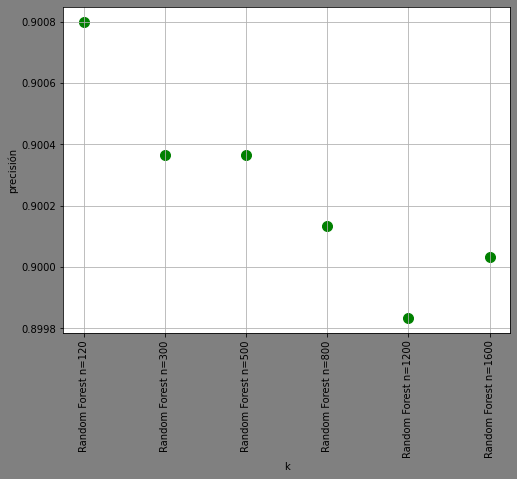

Classifier,Accuracy,Precision,Recall
Random Forest n=120,0.9009777777777778,0.10483870967741936,0.6243412255032367
Random Forest n=300,0.9009666666666667,0.10096774193548387,0.6295930753062855
Random Forest n=500,0.9010555555555556,0.10279569892473119,0.6310570983693514
Random Forest n=800,0.9010555555555556,0.10258064516129033,0.6309719032587137
Random Forest n=1200,0.9008555555555556,0.10172043010752689,0.624726680308353
Random Forest n=1600,0.9009666666666667,0.10279569892473117,0.6274596377167457


In [60]:
#Buscare la Cantidad de arboles adecuada en el bosque 

classificadores_dicc2 = {
                    'Random Forest n=120': RandomForestClassifier(n_estimators=120,class_weight='balanced'),
                    'Random Forest n=300': RandomForestClassifier(n_estimators=300,class_weight='balanced'),
                    'Random Forest n=500': RandomForestClassifier(n_estimators=500,class_weight='balanced'),
                    'Random Forest n=800': RandomForestClassifier(n_estimators=800,class_weight='balanced'),
                    'Random Forest n=1200': RandomForestClassifier(n_estimators=1200,class_weight='balanced'),
                    'Random Forest n=1600': RandomForestClassifier(n_estimators=1600,class_weight='balanced'),
                    }

def tabla_puntajes2(features_set,dataset=priorall_edit):
    features = dataset[features_set]
    classifier_comp = {}
    k_range = []
    score = []
    for x in classificadores_dicc2.keys():
        pipeline =  Pipeline(steps=[('scaler', StandardScaler()),
                                         ("classifier",classificadores_dicc2[x])])
        #produces shuffled lots and splits data in 3 parts
        #This cross-validation object is a merge of StratifiedKFold and ShuffleSplit
        #This module creates a single training/testing set having equally balanced(stratified) classes. 
        cv = StratifiedShuffleSplit(n_splits=3, test_size=0.3, random_state=0)
        acc = []
        pre = []
        rec = []
        for train_index, test_index in cv.split(features, labels):
            X_train, X_test = features.iloc[train_index], features.iloc[test_index]
            #print(labels)
            #print(train_index)
            y_train, y_test = labels[train_index], labels[test_index]
        #    This module is useful as a direct k-fold cross-validation operator: as in it will set up n_folds
        #training/testing sets such that classes are equally balanced in both.
        #cv=StratifiedKFold(n_splits=n_splits).split(enron_data_df[features_5], data_df['poi'])
            pipeline.fit(X_train,y_train)
            predictions = pipeline.predict(X_test)
            acc.append(accuracy_score(predictions,y_test))
            pre.append(precision_score(predictions,y_test))
            rec.append(recall_score(predictions,y_test))
            
        #print pipeline.named_steps
        
        classifier_comp[x]={}
        classifier_comp[x]['accuracy']=np.mean(acc)
        classifier_comp[x]['precision']=np.mean(pre)
        classifier_comp[x]['recall']=np.mean(rec)
        k_range.append(x)
        score.append(accuracy_score(predictions,y_test))
    plt.figure(figsize=(8,6),
           facecolor='gray')
    plt.xlabel('k')
    plt.ylabel('precisión')
    plt.xticks(rotation=90)
    plt.scatter(k_range, score, s=100,color="green")
    plt.grid(True)
    plt.show()
    return classifier_comp


print ("Tuneando Random Forest para n_estimators:")
features_6=priorall_edit.columns.tolist()
DictTable(tabla_puntajes2(features_6))

Al aumentar el número de árboles, la calidad de la clasificación es ligeramente mejor, pero funciona más lento.

Configuro n_estimators=300 y pruebo la profundidad máxima del árbol (max_ depth). 
Si es Ninguno, los nodos se expanden hasta que todas las hojas estén puras o hasta que todas las hojas contengan menos de min_samples_split muestras.

Pruebo la profundidad máxima del árbol (max_ depth)

Tuneando Random Forest para max_depth:


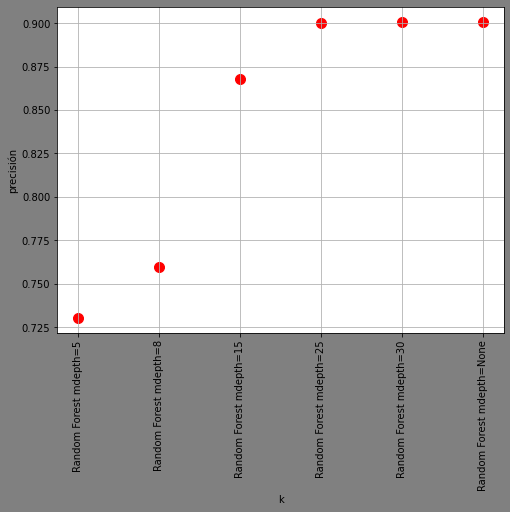

Classifier,Accuracy,Precision,Recall
Random Forest mdepth=5,0.7302222222222222,0.6913978494623656,0.23096049520040773
Random Forest mdepth=8,0.7595666666666666,0.6725806451612902,0.2517198247466847
Random Forest mdepth=15,0.8675777777777777,0.41215053763440856,0.3727617104915833
Random Forest mdepth=25,0.9002888888888888,0.12612903225806452,0.580603893861238
Random Forest mdepth=30,0.9008555555555556,0.10666666666666667,0.6175188477759423
Random Forest mdepth=None,0.9009111111111111,0.10258064516129033,0.6254935225530819


In [61]:
classificadores_dicc3 = {
                    'Random Forest mdepth=5': RandomForestClassifier(n_estimators=300, max_depth=5, class_weight='balanced'),
                    'Random Forest mdepth=8': RandomForestClassifier(n_estimators=300,max_depth=8,class_weight='balanced'),
                    'Random Forest mdepth=15': RandomForestClassifier(n_estimators=300,max_depth=15,class_weight='balanced'),
                    'Random Forest mdepth=25': RandomForestClassifier(n_estimators=300,max_depth=25,class_weight='balanced'),
                    'Random Forest mdepth=30': RandomForestClassifier(n_estimators=300,max_depth=30,class_weight='balanced'),
                    'Random Forest mdepth=None': RandomForestClassifier(n_estimators=300,max_depth=None,class_weight='balanced'),
                    }

def tabla_puntajes3(features_set,dataset=priorall_edit):
    features = dataset[features_set]
    classifier_comp = {}
    k_range = []
    score = []
    for x in classificadores_dicc3.keys():
        pipeline =  Pipeline(steps=[('scaler', StandardScaler()),
                                         ("classifier",classificadores_dicc3[x])])
        #produces shuffled lots and splits data in 3 parts
        #This cross-validation object is a merge of StratifiedKFold and ShuffleSplit
        #This module creates a single training/testing set having equally balanced(stratified) classes. 
        cv = StratifiedShuffleSplit(n_splits=3, test_size=0.3, random_state=0)
        acc = []
        pre = []
        rec = []
        for train_index, test_index in cv.split(features, labels):
            X_train, X_test = features.iloc[train_index], features.iloc[test_index]
            #print(labels)
            #print(train_index)
            y_train, y_test = labels[train_index], labels[test_index]
        #    This module is useful as a direct k-fold cross-validation operator: as in it will set up n_folds
        #training/testing sets such that classes are equally balanced in both.
        #cv=StratifiedKFold(n_splits=n_splits).split(enron_data_df[features_5], data_df['poi'])
            pipeline.fit(X_train,y_train)
            predictions = pipeline.predict(X_test)
            acc.append(accuracy_score(predictions,y_test))
            pre.append(precision_score(predictions,y_test))
            rec.append(recall_score(predictions,y_test))
            
        #print pipeline.named_steps
        
        classifier_comp[x]={}
        classifier_comp[x]['accuracy']=np.mean(acc)
        classifier_comp[x]['precision']=np.mean(pre)
        classifier_comp[x]['recall']=np.mean(rec)
        k_range.append(x)
        score.append(np.mean(acc))
    plt.figure(figsize=(8,6),
           facecolor='gray')
    plt.xlabel('k')
    plt.ylabel('precisión')
    plt.xticks(rotation=90)
    plt.scatter(k_range, score, s=100,color="red")
    plt.grid(True)
    plt.show()
    return classifier_comp


print ("Tuneando Random Forest para max_depth:")
features_6=priorall_edit.columns.tolist()
DictTable(tabla_puntajes3(features_6))
#score = tabla_puntajes3(features_6)

m depth=None ofrece el mejor rendimiento hasta el momento, una precisión mucho mayor en comparación con las pruebas anteriores.

A continuación, probaré la cantidad mínima de muestras necesarias para dividir un nodo interno (min_samples_split)

Predeterminado min_samples_split=2

Ahora pruebo la cantidad mínima de muestras necesarias (min_samples_split)


Tuneando Random Forest para min_samples_split:


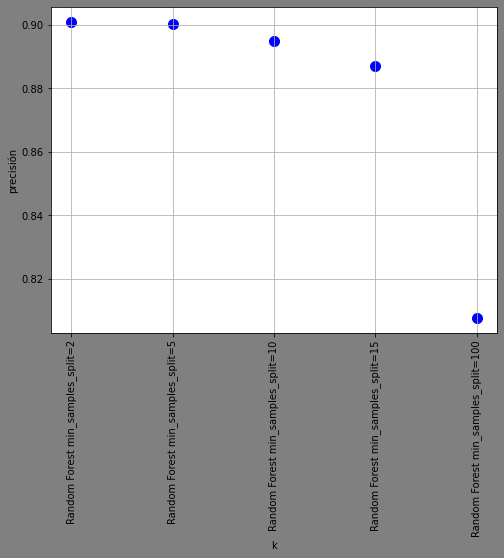

Classifier,Accuracy,Precision,Recall
Random Forest min_samples_split=2,0.9009222222222223,0.10161290322580645,0.6267352817004443
Random Forest min_samples_split=5,0.9001111111111112,0.16182795698924732,0.5577243107769424
Random Forest min_samples_split=10,0.8947444444444445,0.2560215053763441,0.48247088239449926
Random Forest min_samples_split=15,0.8871000000000001,0.32827956989247314,0.4381781560830034
Random Forest min_samples_split=100,0.8076444444444443,0.5990322580645161,0.2908855215533794


In [62]:
classificadores_dicc4 = {
                    'Random Forest min_samples_split=2': RandomForestClassifier(n_estimators=300,max_depth=None,\
                                                                    min_samples_split=2, class_weight='balanced'),
                    'Random Forest min_samples_split=5': RandomForestClassifier(n_estimators=300,max_depth=None,\
                                                                     min_samples_split=5, class_weight='balanced'),
                    'Random Forest min_samples_split=10': RandomForestClassifier(n_estimators=300,max_depth=None,\
                                                                     min_samples_split=10, class_weight='balanced'),
                    'Random Forest min_samples_split=15': RandomForestClassifier(n_estimators=300,max_depth=None,\
                                                                     min_samples_split=15, class_weight='balanced'),
                    'Random Forest min_samples_split=100': RandomForestClassifier(n_estimators=300,max_depth=None,\
                                                                     min_samples_split=100, class_weight='balanced')
                    }

def tabla_puntajes4(features_set,dataset=priorall_edit):
    features = dataset[features_set]
    classifier_comp = {}
    k_range = []
    score = []
    for x in classificadores_dicc4.keys():
        pipeline =  Pipeline(steps=[('scaler', StandardScaler()),
                                         ("classifier",classificadores_dicc4[x])])
        #produces shuffled lots and splits data in 3 parts
        #This cross-validation object is a merge of StratifiedKFold and ShuffleSplit
        #This module creates a single training/testing set having equally balanced(stratified) classes. 
        cv = StratifiedShuffleSplit(n_splits=3, test_size=0.3, random_state=0)
        acc = []
        pre = []
        rec = []
        for train_index, test_index in cv.split(features, labels):
            X_train, X_test = features.iloc[train_index], features.iloc[test_index]
            #print(labels)
            #print(train_index)
            y_train, y_test = labels[train_index], labels[test_index]
        #    This module is useful as a direct k-fold cross-validation operator: as in it will set up n_folds
        #training/testing sets such that classes are equally balanced in both.
        #cv=StratifiedKFold(n_splits=n_splits).split(enron_data_df[features_5], data_df['poi'])
            pipeline.fit(X_train,y_train)
            predictions = pipeline.predict(X_test)
            acc.append(accuracy_score(predictions,y_test))
            pre.append(precision_score(predictions,y_test))
            rec.append(recall_score(predictions,y_test))
            
        #print pipeline.named_steps
        
        classifier_comp[x]={}
        classifier_comp[x]['accuracy']=np.mean(acc)
        classifier_comp[x]['precision']=np.mean(pre)
        classifier_comp[x]['recall']=np.mean(rec)
        k_range.append(x)
        score.append(np.mean(acc))
    plt.figure(figsize=(8,6),
           facecolor='gray')
    plt.xlabel('k')
    plt.ylabel('precisión')
    plt.xticks(rotation=90)
    plt.scatter(k_range, score, s=100,color="blue")
    plt.grid(True)
    plt.show()
    return classifier_comp


print ("Tuneando Random Forest para min_samples_split:")
features_6=priorall_edit.columns.tolist()
DictTable(tabla_puntajes4(features_6))
#score = tabla_puntajes4(features_6)

¡min_samples_split=2 da un mejor resultado!
A continuación probaré los max_leaf_nodes
(max_leaf_nodes) Cultiva árboles con max_leaf_nodes de la mejor manera. Los mejores nodos se definen como una reducción relativa de la impureza.
Si es Ninguno, entonces un número ilimitado de nodos hoja.

Tuneando Random Forest para max_leaf_nodes:


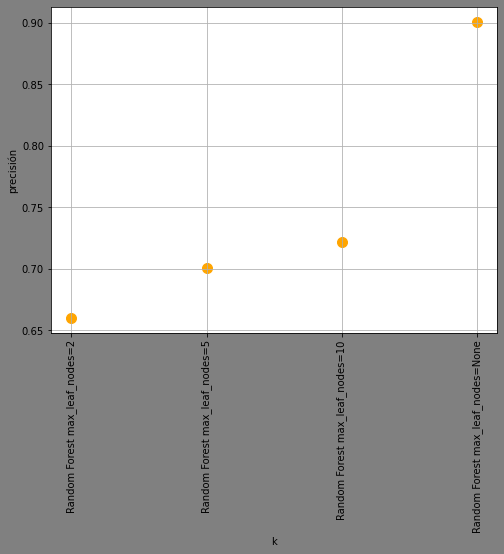

Classifier,Accuracy,Precision,Recall
Random Forest max_leaf_nodes=2,0.659811111111111,0.7077419354838711,0.19115396311594401
Random Forest max_leaf_nodes=5,0.7003666666666667,0.6908602150537635,0.21057866720767363
Random Forest max_leaf_nodes=10,0.7222111111111111,0.6834408602150538,0.22369913462143712
Random Forest max_leaf_nodes=None,0.9010555555555556,0.1024731182795699,0.6304582024763555


In [63]:
classificadores_dicc5 = {
                    'Random Forest max_leaf_nodes=2': RandomForestClassifier(n_estimators=300,max_depth=None,max_leaf_nodes=2,\
                                                                    min_samples_split=2, class_weight='balanced'),
                    'Random Forest max_leaf_nodes=5': RandomForestClassifier(n_estimators=300,max_depth=None,max_leaf_nodes=5,\
                                                                     min_samples_split=2, class_weight='balanced'),
                    'Random Forest max_leaf_nodes=10': RandomForestClassifier(n_estimators=300,max_depth=None,max_leaf_nodes=10,\
                                                                     min_samples_split=2, class_weight='balanced'),
                    'Random Forest max_leaf_nodes=None': RandomForestClassifier(n_estimators=300,max_depth=None,\
                                                                     min_samples_split=2, class_weight='balanced')
                    }

def tabla_puntajes5(features_set,dataset=priorall_edit):
    features = dataset[features_set]
    classifier_comp = {}
    k_range = []
    score = []
    for x in classificadores_dicc5.keys():
        pipeline =  Pipeline(steps=[('scaler', StandardScaler()),
                                         ("classifier",classificadores_dicc5[x])])
        #produces shuffled lots and splits data in 3 parts
        #This cross-validation object is a merge of StratifiedKFold and ShuffleSplit
        #This module creates a single training/testing set having equally balanced(stratified) classes. 
        cv = StratifiedShuffleSplit(n_splits=3, test_size=0.3, random_state=0)
        acc = []
        pre = []
        rec = []
        for train_index, test_index in cv.split(features, labels):
            X_train, X_test = features.iloc[train_index], features.iloc[test_index]
            #print(labels)
            #print(train_index)
            y_train, y_test = labels[train_index], labels[test_index]
        #    This module is useful as a direct k-fold cross-validation operator: as in it will set up n_folds
        #training/testing sets such that classes are equally balanced in both.
        #cv=StratifiedKFold(n_splits=n_splits).split(enron_data_df[features_5], data_df['poi'])
            pipeline.fit(X_train,y_train)
            predictions = pipeline.predict(X_test)
            acc.append(accuracy_score(predictions,y_test))
            pre.append(precision_score(predictions,y_test))
            rec.append(recall_score(predictions,y_test))
            
        #print pipeline.named_steps
        
        classifier_comp[x]={}
        classifier_comp[x]['accuracy']=np.mean(acc)
        classifier_comp[x]['precision']=np.mean(pre)
        classifier_comp[x]['recall']=np.mean(rec)
        k_range.append(x)
        score.append(np.mean(acc))
    plt.figure(figsize=(8,6),
           facecolor='gray')
    plt.xlabel('k')
    plt.ylabel('precisión')
    plt.xticks(rotation=90)
    plt.scatter(k_range, score, s=100,color="orange")
    plt.grid(True)
    plt.show()
    return classifier_comp


print ("Tuneando Random Forest para max_leaf_nodes:")
features_6=priorall_edit.columns.tolist()
DictTable(tabla_puntajes5(features_6))
#score = tabla_puntajes5(features_6)

Es mejor no especificar max_lead_nodes

Por último, probaré max_features
El número de características a considerar al buscar la mejor división:
Si es int, considere las funciones max_features en cada división.
Si es flotante, max_features es un porcentaje y las características int(max_features * n_features) se consideran en cada división.
Si es "automático", entonces max_features=sqrt(n_features).
Si es "sqrt", entonces max_features=sqrt(n_features) (igual que "auto").
Si es "log2", entonces max_features=log2(n_features).
Si ninguno, entonces max_features=n_features.
Nota: la búsqueda de una división no se detiene hasta que se encuentra al menos una partición válida de las muestras de nodos, incluso si requiere inspeccionar efectivamente más funciones que max_features.

Tuneando Random Forest para max_leaf_nodes:


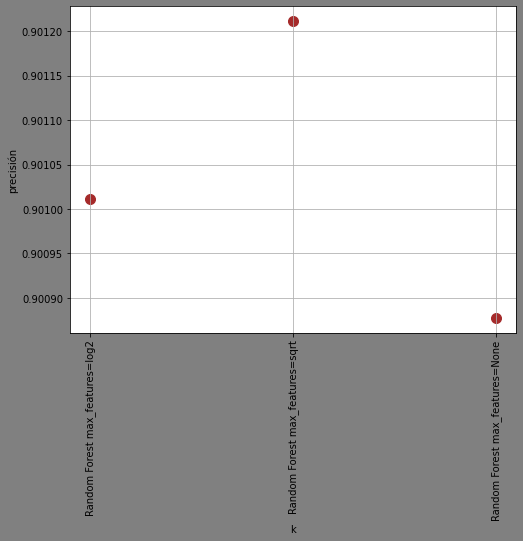

Classifier,Accuracy,Precision,Recall
Random Forest max_features=log2,0.9010111111111111,0.10408602150537634,0.6269846909461011
Random Forest max_features=sqrt,0.9012111111111111,0.10623655913978496,0.6307073480405582
Random Forest max_features=None,0.9008777777777778,0.10064516129032258,0.6269576573355535


In [64]:
classificadores_dicc6 = {
                        'Random Forest max_features=log2': RandomForestClassifier(n_estimators=300,max_depth=None,\
                                                                     max_features='log2',min_samples_split=2, class_weight='balanced'),
                        'Random Forest max_features=sqrt': RandomForestClassifier(n_estimators=300,max_depth=None,\
                                                                     max_features='auto',min_samples_split=2, class_weight='balanced'),
                        'Random Forest max_features=None': RandomForestClassifier(n_estimators=300,max_depth=None,\
                                                                     min_samples_split=2, class_weight='balanced')
                    }

def tabla_puntajes6(features_set,dataset=priorall_edit):
    features = dataset[features_set]
    classifier_comp = {}
    k_range = []
    score = []
    for x in classificadores_dicc6.keys():
        pipeline =  Pipeline(steps=[('scaler', StandardScaler()),
                                         ("classifier",classificadores_dicc6[x])])
        #produces shuffled lots and splits data in 3 parts
        #This cross-validation object is a merge of StratifiedKFold and ShuffleSplit
        #This module creates a single training/testing set having equally balanced(stratified) classes. 
        cv = StratifiedShuffleSplit(n_splits=3, test_size=0.3, random_state=0)
        acc = []
        pre = []
        rec = []
        for train_index, test_index in cv.split(features, labels):
            X_train, X_test = features.iloc[train_index], features.iloc[test_index]
            #print(labels)
            #print(train_index)
            y_train, y_test = labels[train_index], labels[test_index]
        #    This module is useful as a direct k-fold cross-validation operator: as in it will set up n_folds
        #training/testing sets such that classes are equally balanced in both.
        #cv=StratifiedKFold(n_splits=n_splits).split(enron_data_df[features_5], data_df['poi'])
            pipeline.fit(X_train,y_train)
            predictions = pipeline.predict(X_test)
            acc.append(accuracy_score(predictions,y_test))
            pre.append(precision_score(predictions,y_test))
            rec.append(recall_score(predictions,y_test))
            
        #print pipeline.named_steps
        
        classifier_comp[x]={}
        classifier_comp[x]['accuracy']=np.mean(acc)
        classifier_comp[x]['precision']=np.mean(pre)
        classifier_comp[x]['recall']=np.mean(rec)
        k_range.append(x)
        score.append(np.mean(acc))
    plt.figure(figsize=(8,6),
           facecolor='gray')
    plt.xlabel('k')
    plt.ylabel('precisión')
    plt.xticks(rotation=90)
    plt.scatter(k_range, score, s=100,color="brown")
    plt.grid(True)
    plt.show()
    return classifier_comp


print ("Tuneando Random Forest para max_leaf_nodes:")
features_6=priorall_edit.columns.tolist()
DictTable(tabla_puntajes6(features_6))
#score = tabla_puntajes6(features_6)

#### Una vez obtenidos los parametros con mejor resultado, podemos ejecutar el entrenamiento y luego el modelo con los datos de prueba.

##### 
clasificador_rf = RandomForestClassifier(n_estimators=300,max_depth=None,max_features='log2',min_samples_split=2, class_weight='balanced')
